In [80]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [81]:
stock_data = pd.read_csv('./data/stock_price.csv')


In [82]:
stock_data

,日付け,終値,始値,高値,安値,出来高,変化率 %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%
...,...,...,...,...,...,...,...
9197,1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%
9198,1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%
9199,1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%
9200,1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%


In [83]:
# Checking basic statistics of the dataset to understand key metrics
stock_data.describe()


,終値,始値,高値,安値
count,9202.000000,9202.000000,9202.000000,9202.000000
mean,92.180961,92.256183,93.176451,91.330146
std,50.452228,50.598215,51.049837,50.087405
min,33.000000,33.000000,33.200000,32.200000
25%,52.000000,52.100000,52.800000,51.500000
50%,85.100000,85.100000,86.050000,84.200000
75%,110.800000,110.800000,111.900000,109.275000
max,305.900000,309.800000,311.800000,303.900000


In [84]:
# Renaming the columns to English for consistency
stock_data.columns = ['Date', 'Closing Price', 'Opening Price', 'High Price', 'Low Price', 'Volume', 'Percentage Change']

# Converting 'Volume' from strings with 'M' and 'B' to numerical values
stock_data['Volume'] = stock_data['Volume'].replace({'M': '*1e6', 'B': '*1e9'}, regex=True).map(pd.eval).astype(float)




In [85]:
df = stock_data
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               9202 non-null   object 
 1   Closing Price      9202 non-null   float64
 2   Opening Price      9202 non-null   float64
 3   High Price         9202 non-null   float64
 4   Low Price          9202 non-null   float64
 5   Volume             9202 non-null   float64
 6   Percentage Change  9202 non-null   object 
dtypes: float64(5), object(2)
memory usage: 503.4+ KB


Since Date is string (object) type, we convert it to datetime. 

In [86]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
# df.set_index('Date', inplace=True)

# Converting 'Percentage Change' from string to float
stock_data['Percentage Change'] = stock_data['Percentage Change'].str.replace('%', '').astype(float)

In [87]:
stock_data.head()

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change
0,2024-08-01,156.3,159.3,159.4,156.1,79150000.0,-2.56
1,2024-07-31,160.4,158.2,160.7,158.1,173910000.0,1.07
2,2024-07-30,158.7,158.8,159.2,158.0,138140000.0,-0.63
3,2024-07-29,159.7,158.7,160.2,158.4,126280000.0,1.14
4,2024-07-26,157.9,159.3,159.6,157.9,155080000.0,-0.13


In [88]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               9202 non-null   datetime64[ns]
 1   Closing Price      9202 non-null   float64       
 2   Opening Price      9202 non-null   float64       
 3   High Price         9202 non-null   float64       
 4   Low Price          9202 non-null   float64       
 5   Volume             9202 non-null   float64       
 6   Percentage Change  9202 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 503.4 KB


### EDA : Summary Statistics - Stock Data Analysis

#### Overview
This document provides an analysis of stock price data, including closing, opening, high, and low prices, as well as trading volume and percentage change.

#### Summary Statistics
##### Stock Prices (Closing, Opening, High, Low)
- **Average Closing Price**: ¥92.18
- **Minimum Closing Price**: ¥33.00
- **Maximum Closing Price**: ¥305.90

This indicates a wide range of stock prices in the dataset.

#### Volume
- **Average Trading Volume**: Approximately 172.67 million
- **Standard Deviation**: Significant, suggesting variable trading activity.

#### Percentage Change
- **Mean Daily Percentage Change**: Around 0.02%
- **Range**: From -14.74% to 16.25%, indicating market volatility.


In [89]:
# Checking for any missing values in the dataset
missing_values = stock_data.isnull().sum()

# Displaying the cleaned dataset and missing values check
missing_values

Date                 0
Closing Price        0
Opening Price        0
High Price           0
Low Price            0
Volume               0
Percentage Change    0
dtype: int64

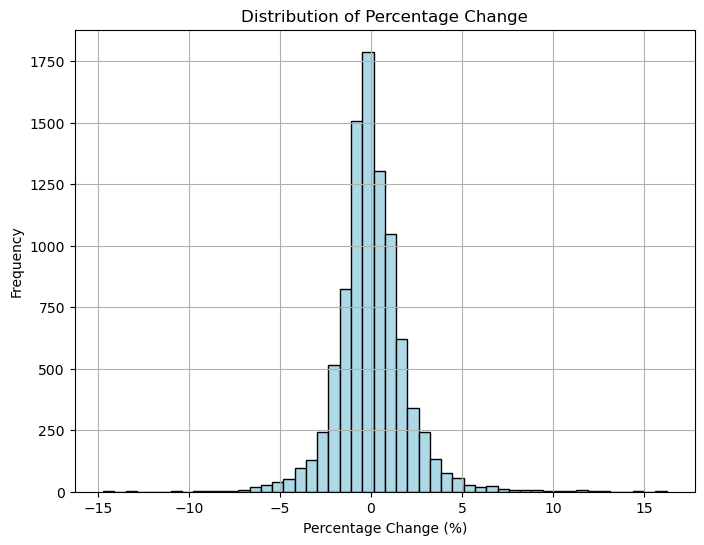

In [90]:
# Plotting the distribution of percentage change
plt.figure(figsize=(8,6))
plt.hist(stock_data['Percentage Change'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribution of Percentage Change')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [91]:
stock_data['Date']

0      2024-08-01
1      2024-07-31
2      2024-07-30
3      2024-07-29
4      2024-07-26
          ...    
9197   1987-02-18
9198   1987-02-17
9199   1987-02-16
9200   1987-02-13
9201   1987-02-12
Name: Date, Length: 9202, dtype: datetime64[ns]

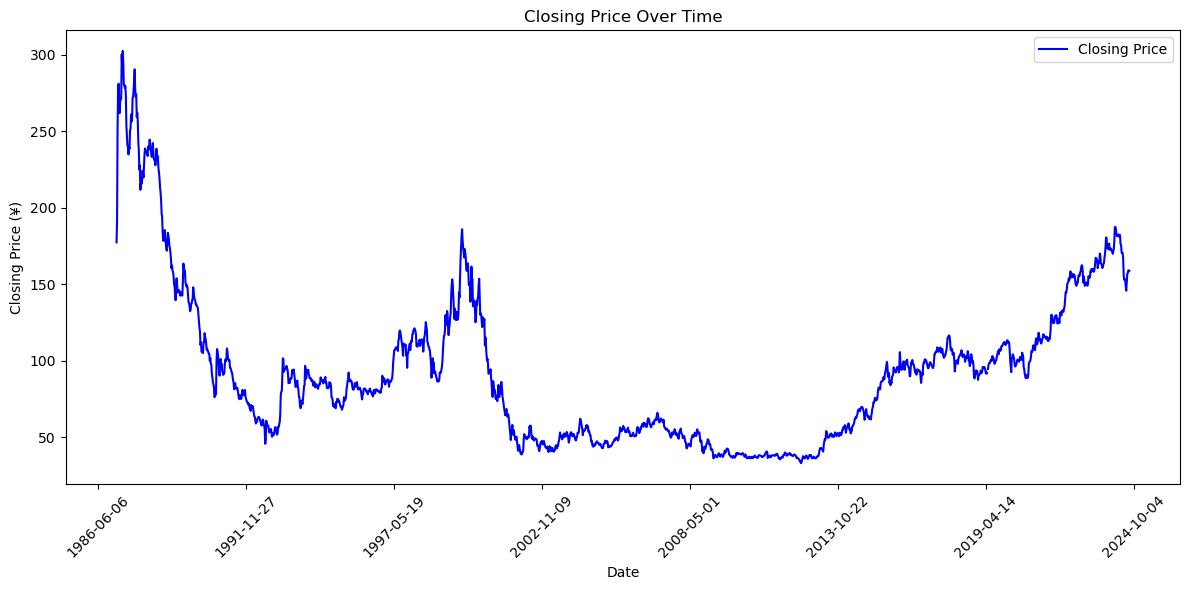

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your 'Date' column is already converted to datetime

# Resample the data to reduce the number of points (e.g., weekly average)
stock_data_resampled = stock_data.resample('W', on='Date').mean()

# Plotting the resampled data
plt.figure(figsize=(12,6))
plt.plot(stock_data_resampled.index, stock_data_resampled['Closing Price'], color='blue', label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (¥)')

# Improving x-axis readability
plt.xticks(rotation=45)

# Limit the number of x-ticks shown
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.legend()
plt.tight_layout()
plt.show()


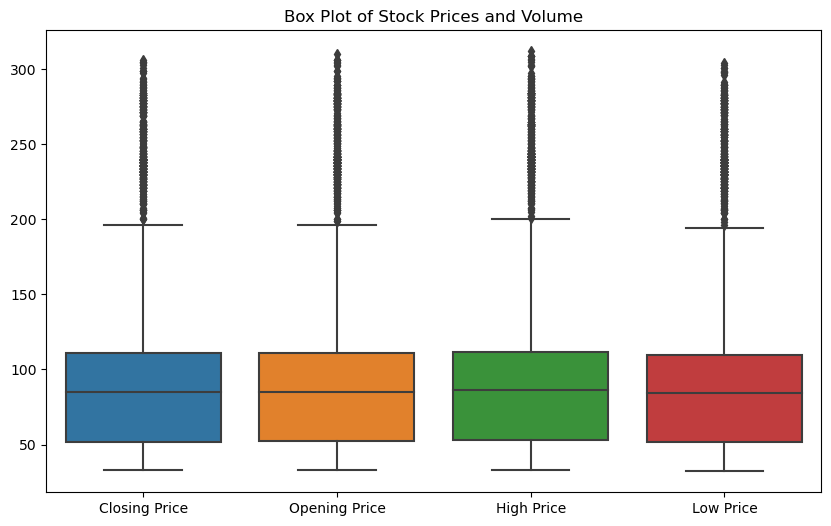

In [93]:
import seaborn as sns 

# Visualizations
df = stock_data

# Box plot to identify outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=stock_data[['Closing Price', 'Opening Price', 'High Price', 'Low Price']])
plt.title('Box Plot of Stock Prices and Volume')
plt.show()


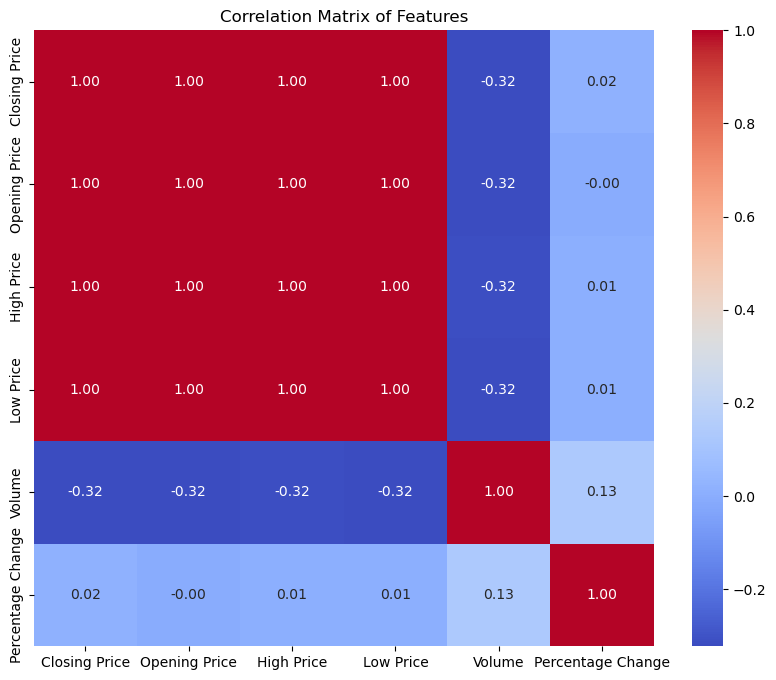

In [94]:
import seaborn as sns

# Correlation matrix to analyze relationships between features
correlation_matrix = stock_data[['Closing Price', 'Opening Price', 'High Price', 'Low Price', 'Volume', 'Percentage Change']].corr()

# Plotting the correlation matrix with values
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


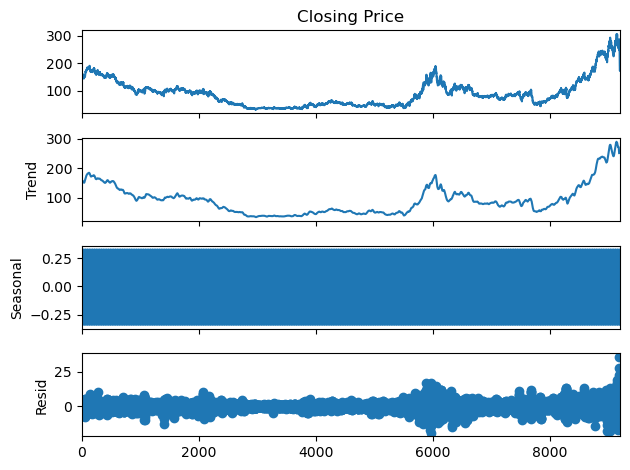

In [95]:
# Trend and Seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the Closing Price
decomposition = seasonal_decompose(df['Closing Price'], model='additive', period=30)  # assuming monthly seasonality

fig = decomposition.plot()
plt.show()


In [96]:
# Outlier Detection using Z-Score
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['Closing Price']))
threshold = 3
outliers = np.where(z_scores > threshold)
print(f"Number of outliers in Closing Price: {len(outliers[0])}")


Number of outliers in Closing Price: 177


### Scaling

In [97]:
# Scaling the numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Selecting features for scaling (excluding Date and Percentage Change as it is in percentage form)
features_to_scale = ['Closing Price', 'Opening Price', 'High Price', 'Low Price', 'Volume']

# Initializing the scaler
scaler = MinMaxScaler()

# Scaling the selected features
stock_data[features_to_scale] = scaler.fit_transform(stock_data[features_to_scale])

# Displaying the first few rows to verify scaling
stock_data[['Date', 'Closing Price', 'Opening Price', 'High Price', 'Low Price', 'Volume']].head()


,Date,Closing Price,Opening Price,High Price,Low Price,Volume
0,2024-08-01,0.451814,0.456286,0.452979,0.456018,0.054940
1,2024-07-31,0.466838,0.452312,0.457645,0.463379,0.129515
2,2024-07-30,0.460608,0.454480,0.452261,0.463011,0.101365
3,2024-07-29,0.464273,0.454118,0.455851,0.464483,0.092031
4,2024-07-26,0.457677,0.456286,0.453697,0.462643,0.114696


In [98]:
# Print date range of the dataset
print('Date Range:', stock_data['Date'].min(), 'to', stock_data['Date'].max())

Date Range: 1987-02-12 00:00:00 to 2024-08-01 00:00:00


In [99]:
# Feature Engineering

# Moving Averages
df['MA10'] = df['Closing Price'].rolling(window=10).mean()
df['MA50'] = df['Closing Price'].rolling(window=50).mean()

# Lag Features
for lag in range(1, 6):
    df[f'Lag_{lag}'] = df['Closing Price'].shift(lag)

# Volatility (Standard Deviation)
df['Volatility'] = df['Closing Price'].rolling(window=10).std()

# Drop rows with NaN values generated by feature engineering
df.dropna(inplace=True)

print(df.head())


         Date  Closing Price  Opening Price  High Price  Low Price    Volume  \
49 2024-05-23       0.438989       0.436416    0.434673   0.440927  0.158996   
50 2024-05-22       0.445218       0.440029    0.441134   0.447921  0.166166   
51 2024-05-21       0.440454       0.433526    0.431084   0.442032  0.154951   
52 2024-05-20       0.435324       0.429913    0.435032   0.439087  0.273826   
53 2024-05-17       0.435324       0.429913    0.442570   0.439455  0.320865   

    Percentage Change      MA10      MA50     Lag_1     Lag_2     Lag_3  \
49              -1.10  0.441627  0.443569  0.438256  0.449982  0.442653   
50               0.85  0.442360  0.443437  0.438989  0.438256  0.449982   
51               0.92  0.441993  0.442909  0.445218  0.438989  0.438256   
52               0.00  0.440821  0.442404  0.440454  0.445218  0.438989   
53              -1.43  0.439905  0.441825  0.435324  0.440454  0.445218   

       Lag_4     Lag_5  Volatility  
49  0.436057  0.436790    0.004

### Model selection

In [100]:
import pandas as pd 

In [101]:
df.to_csv('./data/stock_data_preprocessed.csv', index=False)

In [102]:
df = pd.read_csv('./data/stock_data_preprocessed.csv')
df.head()

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,2024-05-23,0.438989,0.436416,0.434673,0.440927,0.158996,-1.10,0.441627,0.443569,0.438256,0.449982,0.442653,0.436057,0.436790,0.004730
1,2024-05-22,0.445218,0.440029,0.441134,0.447921,0.166166,0.85,0.442360,0.443437,0.438989,0.438256,0.449982,0.442653,0.436057,0.004654
2,2024-05-21,0.440454,0.433526,0.431084,0.442032,0.154951,0.92,0.441993,0.442909,0.445218,0.438989,0.438256,0.449982,0.442653,0.004644
3,2024-05-20,0.435324,0.429913,0.435032,0.439087,0.273826,0.00,0.440821,0.442404,0.440454,0.445218,0.438989,0.438256,0.449982,0.004705
4,2024-05-17,0.435324,0.429913,0.442570,0.439455,0.320865,-1.43,0.439905,0.441825,0.435324,0.440454,0.445218,0.438989,0.438256,0.004803


In [103]:
# Sort the data by 'Date' in ascending order
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)


In [104]:
df.head()

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,1987-02-12,0.547453,0.539740,0.535535,0.552816,1.000000,16.25,0.637486,0.831462,0.511176,0.522169,0.547453,0.579700,0.597655,0.126515
1,1987-02-13,0.511176,0.518425,0.514358,0.516378,0.325059,-5.43,0.661195,0.840293,0.522169,0.547453,0.579700,0.597655,0.651521,0.129936
2,1987-02-16,0.522169,0.483020,0.510768,0.491351,0.276368,1.74,0.691022,0.849564,0.547453,0.579700,0.597655,0.651521,0.741297,0.125844
3,1987-02-17,0.547453,0.518425,0.542355,0.527420,0.686391,3.93,0.723342,0.857897,0.579700,0.597655,0.651521,0.741297,0.870649,0.118974
4,1987-02-18,0.579700,0.553829,0.567121,0.567170,0.618379,4.82,0.757091,0.865365,0.597655,0.651521,0.741297,0.870649,0.805790,0.111146


Now the data is in ascending order according to the dates. We can go forward with model selection and training. 

### Model Selection

In [105]:
stock_data = df

In [106]:

# Perform the Augmented Dickey-Fuller test to check stationarity on the 'Closing Price'
from statsmodels.tsa.stattools import adfuller

# ADF test on 'Closing Price'
adf_result = adfuller(stock_data['Closing Price'])

# Extract the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

adf_statistic, p_value, critical_values


(-3.6301764848635467,
 0.0052096441167996665,
 {'1%': -3.4310660523809275,
  '5%': -2.861856449258006,
  '10%': -2.56693844088655})

### ADF Test Results

#### ADF Statistic
- **Value**: -3.63

#### p-value
- **Value**: 0.0052

#### Critical Values
- **1%**: -3.43  
- **5%**: -2.86  
- **10%**: -2.57

### Interpretation
Since the ADF Statistic (-3.63) is lower than the critical values at all levels (1%, 5%, and 10%), and the p-value (0.0052) is less than 0.05, we can reject the null hypothesis of the ADF test.

### Conclusion
The data is stationary, which is a good sign for proceeding with an ARIMA model.


In [107]:
df

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,1987-02-12,0.547453,0.539740,0.535535,0.552816,1.000000,16.25,0.637486,0.831462,0.511176,0.522169,0.547453,0.579700,0.597655,0.126515
1,1987-02-13,0.511176,0.518425,0.514358,0.516378,0.325059,-5.43,0.661195,0.840293,0.522169,0.547453,0.579700,0.597655,0.651521,0.129936
2,1987-02-16,0.522169,0.483020,0.510768,0.491351,0.276368,1.74,0.691022,0.849564,0.547453,0.579700,0.597655,0.651521,0.741297,0.125844
3,1987-02-17,0.547453,0.518425,0.542355,0.527420,0.686391,3.93,0.723342,0.857897,0.579700,0.597655,0.651521,0.741297,0.870649,0.118974
4,1987-02-18,0.579700,0.553829,0.567121,0.567170,0.618379,4.82,0.757091,0.865365,0.597655,0.651521,0.741297,0.870649,0.805790,0.111146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9148,2024-05-17,0.435324,0.429913,0.442570,0.439455,0.320865,-1.43,0.439905,0.441825,0.435324,0.440454,0.445218,0.438989,0.438256,0.004803
9149,2024-05-20,0.435324,0.429913,0.435032,0.439087,0.273826,0.00,0.440821,0.442404,0.440454,0.445218,0.438989,0.438256,0.449982,0.004705
9150,2024-05-21,0.440454,0.433526,0.431084,0.442032,0.154951,0.92,0.441993,0.442909,0.445218,0.438989,0.438256,0.449982,0.442653,0.004644
9151,2024-05-22,0.445218,0.440029,0.441134,0.447921,0.166166,0.85,0.442360,0.443437,0.438989,0.438256,0.449982,0.442653,0.436057,0.004654


In [108]:
from statsmodels.tsa.stattools import adfuller

stock_data = df
result = adfuller(stock_data['Closing Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -3.6301764848635467
p-value: 0.0052096441167996665


In [109]:
import matplotlib.pyplot as plt

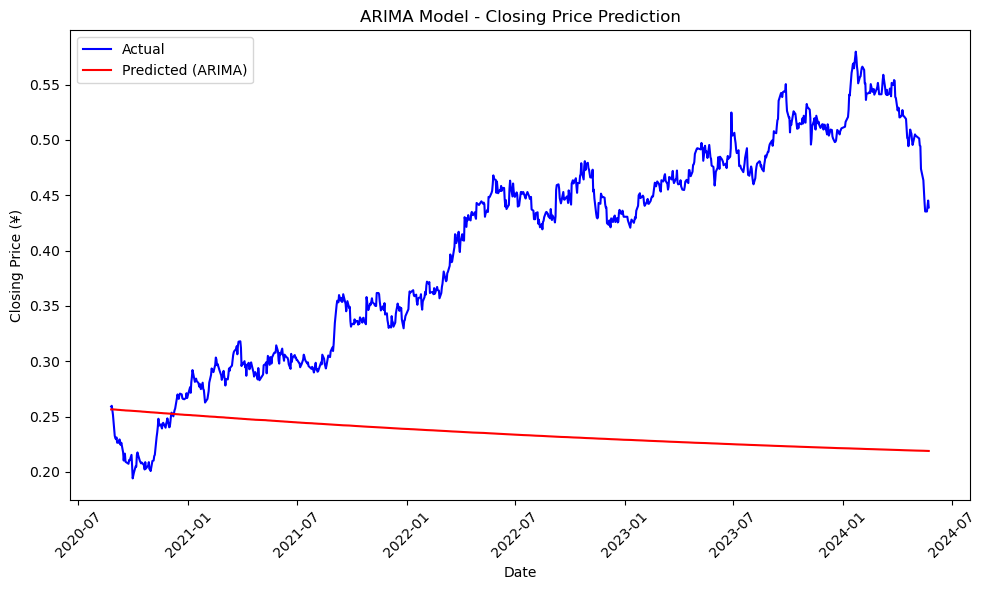

(0.039831234410635, 0.1728936024866257, -3.2463666530691278)

In [110]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Split the data into training and testing sets
train_size = int(len(stock_data) * 0.9)
train_data, test_data = stock_data['Closing Price'][:train_size], stock_data['Closing Price'][train_size:]

# Fit ARIMA model (initial parameters for p, d, q can be refined later)
model_arima = ARIMA(train_data, order=(5, 0, 0))  # Initial ARIMA(5,1,0) model
arima_fit = model_arima.fit()

# Make predictions
arima_predictions = arima_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics
mse_arima = mean_squared_error(test_data, arima_predictions)
mae_arima = mean_absolute_error(test_data, arima_predictions)
rsq_arima = 1 - (sum((test_data - arima_predictions)**2) / sum((test_data - np.mean(test_data))**2))

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data['Date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(stock_data['Date'][train_size:], arima_predictions, label='Predicted (ARIMA)', color='red')
plt.title('ARIMA Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mse_arima, mae_arima, rsq_arima

Simple ARIMA doesn't give correct output as we only predict using single variable closing price. 

Now when we try using other features including Volume, Moving Average and Volatility, it gives us better predictions.  

c:\Users\Pranav\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 0.000, MAE: 0.008, R-Squared: 0.989


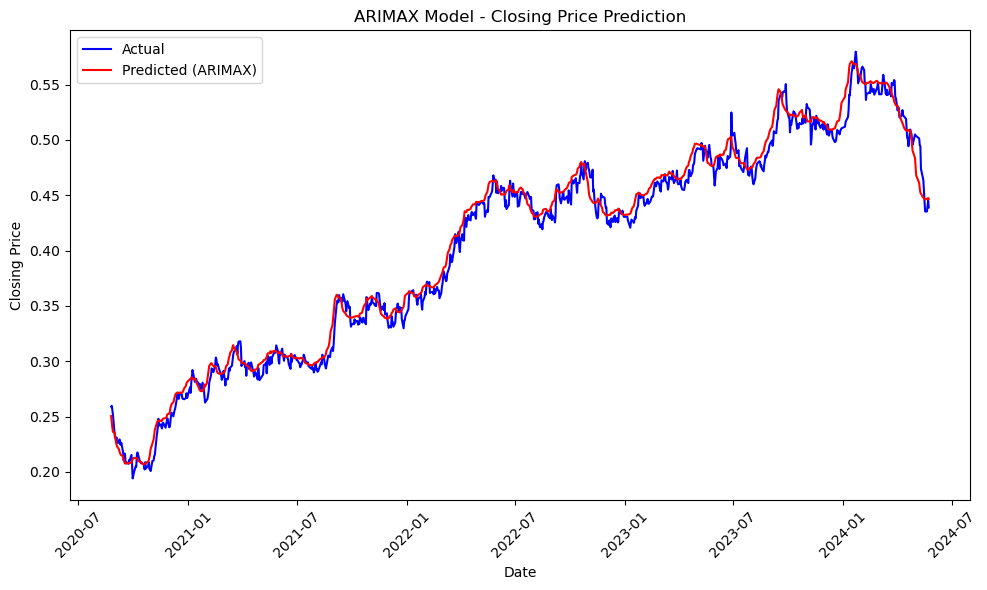

In [111]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(stock_data) * 0.9)
train_data, test_data = stock_data['Closing Price'][:train_size], stock_data['Closing Price'][train_size:]

# Define exogenous variables (for example: Volume, MA10, Volatility)
exog_train = stock_data[['Volume', 'MA10', 'Volatility']][:train_size]
exog_test = stock_data[['Volume', 'MA10', 'Volatility']][train_size:]

# Fit ARIMAX model
model_arimax = ARIMA(train_data, exog=exog_train, order=(5, 0, 0))  # Adjust p, d, q accordingly
arimax_fit = model_arimax.fit()

# Make predictions using exogenous variables for the test set
arimax_predictions = arimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Evaluate performance
mse_arimax = mean_squared_error(test_data, arimax_predictions)
mae_arimax = mean_absolute_error(test_data, arimax_predictions)
rsq_arimax = 1 - (sum((test_data - arimax_predictions)**2) / sum((test_data - np.mean(test_data))**2))

print(f'MSE: {mse_arimax:.3f}, MAE: {mae_arimax:.3f}, R-Squared: {rsq_arimax:.3f}')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data['Date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(stock_data['Date'][train_size:], arimax_predictions, label='Predicted (ARIMAX)', color='red')
plt.title('ARIMAX Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that ARIMA with other features gave us good results. But We can't take Volume and Variability features, as they won't be available to us during predictions. 

Hence we try to do predictions using Lag. 

MSE: 0.0000, MAE: 0.0044, R-Squared: 0.9963


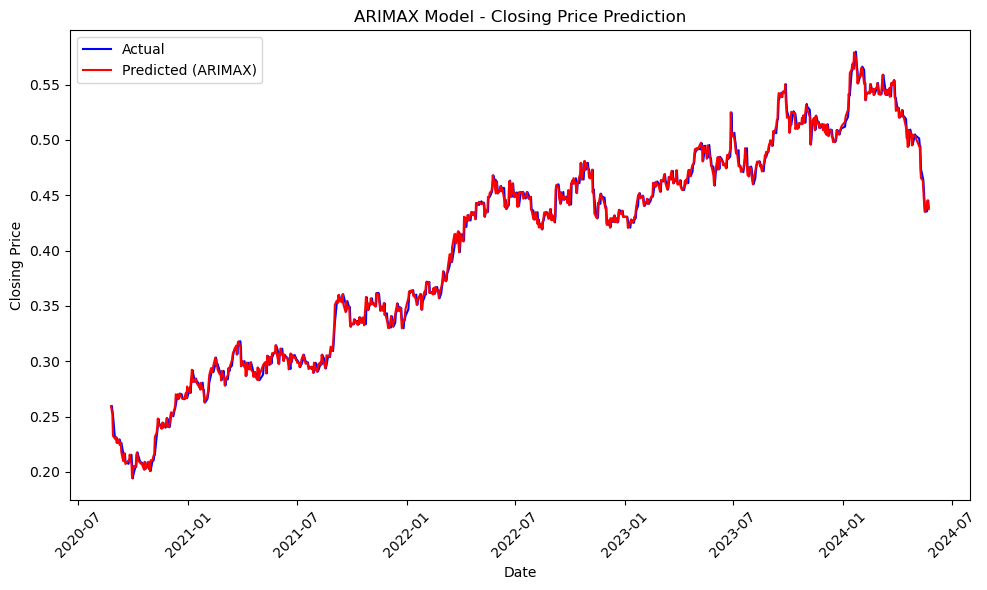

In [112]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(stock_data) * 0.9)
train_data, test_data = stock_data['Closing Price'][:train_size], stock_data['Closing Price'][train_size:]

# Use lag features (e.g., Lag_1, Lag_2, ..., Lag_5) instead of moving averages and volatility
exog_train = stock_data[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']][:train_size]
exog_test = stock_data[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']][train_size:]

# Fit ARIMAX model with lagged features as exogenous variables
model_arimax = ARIMA(train_data, exog=exog_train, order=(5, 0, 0))  # Adjust p, d, q accordingly
arimax_fit = model_arimax.fit()

# Make predictions using exogenous variables for the test set
arimax_predictions = arimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Evaluate performance
mse_arimax = mean_squared_error(test_data, arimax_predictions)
mae_arimax = mean_absolute_error(test_data, arimax_predictions)
rsq_arimax = 1 - (sum((test_data - arimax_predictions)**2) / sum((test_data - np.mean(test_data))**2))

print(f'MSE: {mse_arimax:.4f}, MAE: {mae_arimax:.4f}, R-Squared: {rsq_arimax:.4f}')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data['Date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(stock_data['Date'][train_size:], arimax_predictions, label='Predicted (ARIMAX)', color='red')
plt.title('ARIMAX Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### LSTM 

Epoch 1/10
227/227 [==============================] - 11s 29ms/step - loss: 0.0010
Epoch 2/10
227/227 [==============================] - 6s 28ms/step - loss: 2.3327e-04
Epoch 3/10
227/227 [==============================] - 7s 29ms/step - loss: 2.1459e-04
Epoch 4/10
227/227 [==============================] - 7s 29ms/step - loss: 1.7505e-04
Epoch 5/10
227/227 [==============================] - 7s 29ms/step - loss: 1.5632e-04
Epoch 6/10
227/227 [==============================] - 7s 29ms/step - loss: 1.5339e-04
Epoch 7/10
227/227 [==============================] - 7s 30ms/step - loss: 1.3526e-04
Epoch 8/10
227/227 [==============================] - 7s 32ms/step - loss: 1.3493e-04
Epoch 9/10
227/227 [==============================] - 7s 33ms/step - loss: 1.2520e-04
Epoch 10/10
56/56 [==============================] - 1s 11ms/step


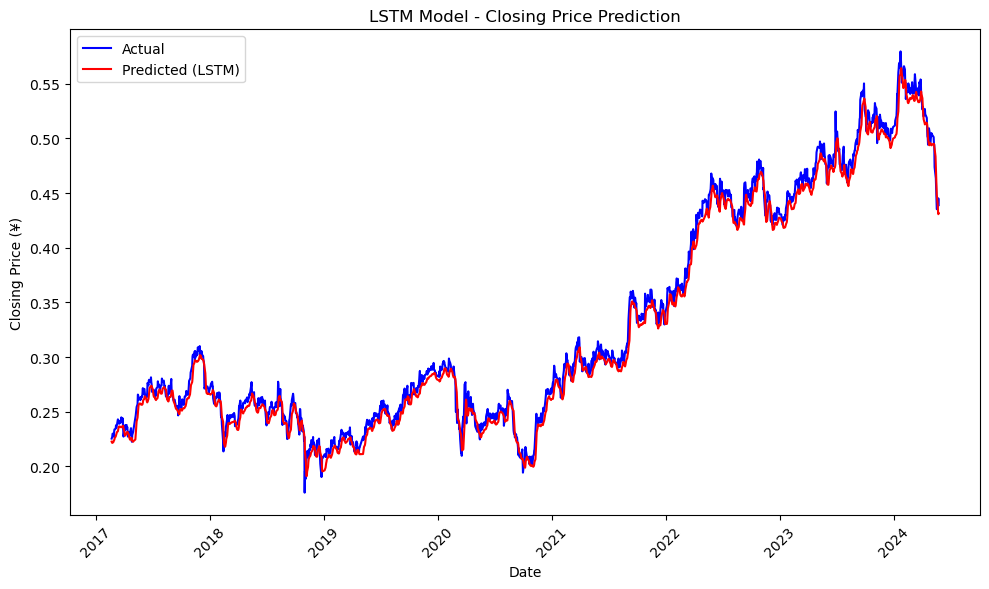

MSE (LSTM): 0.00010
MAE (LSTM): 0.00783
R-Squared (LSTM): 0.99116


In [113]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Prepare the data for LSTM
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

# Scaling the 'Closing Price' column between 0 and 1 for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Closing Price'].values.reshape(-1,1))

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create the LSTM input dataset
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

# Compile and train the LSTM model
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Predict on test data
lstm_predictions = model_lstm.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Inverse scaling for actual test values
Y_test_scaled = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate evaluation metrics for LSTM
mse_lstm = mean_squared_error(Y_test_scaled, lstm_predictions)
mae_lstm = mean_absolute_error(Y_test_scaled, lstm_predictions)

ss_res = np.sum((Y_test_scaled - lstm_predictions) ** 2)
ss_tot = np.sum((Y_test_scaled - np.mean(Y_test_scaled)) ** 2)
rsq_lstm = 1 - (ss_res / ss_tot)


# Plot the LSTM results
plt.figure(figsize=(10,6))
plt.plot(df['Date'][train_size+time_step:], Y_test_scaled, label='Actual', color='blue')
plt.plot(df['Date'][train_size+time_step:], lstm_predictions, label='Predicted (LSTM)', color='red')
plt.title('LSTM Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"MSE (LSTM): {mse_lstm:.5f}")
print(f"MAE (LSTM): {mae_lstm:.5f}")
print(f"R-Squared (LSTM): {rsq_lstm:.5f}")


### GRU

Epoch 1/10
256/256 [==============================] - 11s 30ms/step - loss: 0.0023
Epoch 2/10
256/256 [==============================] - 7s 27ms/step - loss: 8.8676e-05
Epoch 3/10
256/256 [==============================] - 7s 28ms/step - loss: 7.7766e-05
Epoch 4/10
256/256 [==============================] - 11s 45ms/step - loss: 7.0364e-05
Epoch 5/10
256/256 [==============================] - 10s 39ms/step - loss: 6.9528e-05
Epoch 6/10
256/256 [==============================] - 7s 28ms/step - loss: 6.2087e-05
Epoch 7/10
256/256 [==============================] - 7s 29ms/step - loss: 6.5523e-05
Epoch 8/10
256/256 [==============================] - 9s 36ms/step - loss: 6.2514e-05
Epoch 9/10
256/256 [==============================] - 10s 37ms/step - loss: 5.9368e-05
Epoch 10/10
27/27 [==============================] - 1s 9ms/step


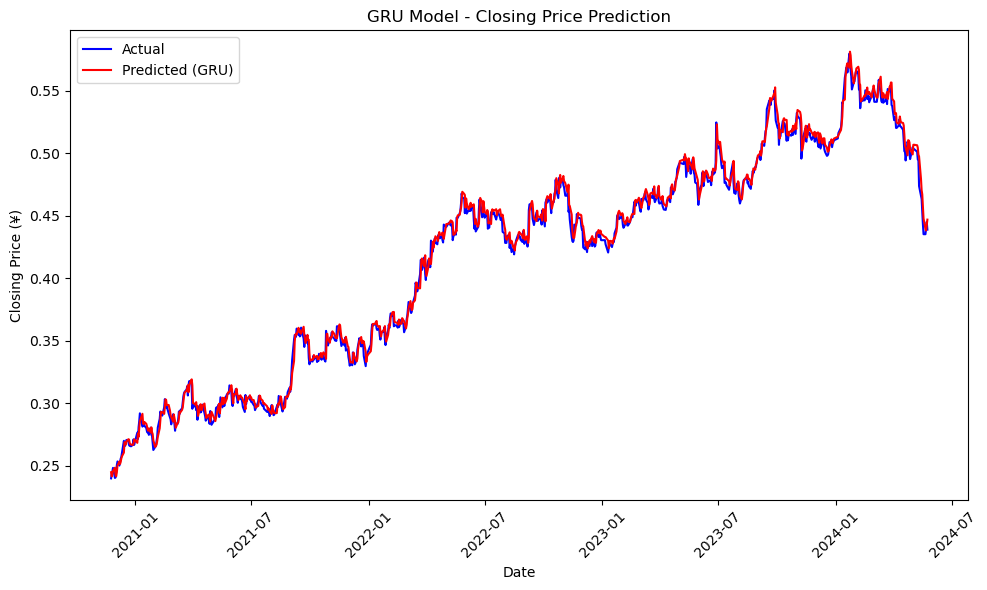

MSE (GRU): 0.00004
MAE (GRU): 0.00488
R-Squared (GRU): 0.99464


In [114]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Prepare the data for GRU
def create_dataset(data, time_step=10):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

# Scaling the 'Closing Price' column between 0 and 1 for GRU
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Closing Price'].values.reshape(-1,1))

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.9)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create the GRU input dataset
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build GRU model
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(units=50))
model_gru.add(Dense(1))

# Compile and train the GRU model
model_gru.compile(loss='mean_squared_error', optimizer='adam')
model_gru.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Predict on test data
gru_predictions = model_gru.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

# Inverse scaling for actual test values
Y_test_scaled = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate evaluation metrics for GRU
mse_gru = mean_squared_error(Y_test_scaled, gru_predictions)
mae_gru = mean_absolute_error(Y_test_scaled, gru_predictions)

# Calculate R-Squared
ss_res = np.sum((Y_test_scaled - gru_predictions) ** 2)
ss_tot = np.sum((Y_test_scaled - np.mean(Y_test_scaled)) ** 2)
rsq_gru = 1 - (ss_res / ss_tot)

# Plot the GRU results
plt.figure(figsize=(10,6))
plt.plot(df['Date'][train_size+time_step:], Y_test_scaled, label='Actual', color='blue')
plt.plot(df['Date'][train_size+time_step:], gru_predictions, label='Predicted (GRU)', color='red')
plt.title('GRU Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print evaluation metrics
print(f"MSE (GRU): {mse_gru:.5f}")
print(f"MAE (GRU): {mae_gru:.5f}")
print(f"R-Squared (GRU): {rsq_gru:.5f}")
